## Lasso Regression Setup

We begin by importing the necessary libraries for implementing **Lasso Regression**, a regularised linear model that can both shrink coefficients and perform feature selection by driving some coefficients to zero. This makes it particularly useful when dealing with datasets with many features.

- `Lasso` from `sklearn.linear_model` is used to create the regression model.
- Standard tools like `train_test_split`, `StandardScaler`, and performance metrics such as MAE, MSE, and R² are also imported.
- The cleaned dataset is loaded (`clean_dataset.csv`), and column names are stripped of any leading/trailing whitespace to ensure consistency.

This setup prepares the notebook for training and evaluating Lasso regression models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

dataset = pd.read_csv('clean_dataset.csv')
dataset.columns = dataset.columns.str.strip()


### Lasso Regression Function

This function trains and evaluates a Lasso regression model using the selected target variable. The dataset is split into training and test sets, scaled using `StandardScaler`, and then passed through a Lasso model with a specified alpha.

The function outputs:
- R² scores for both training and test sets
- MAE and RMSE for predictive performance
- A scatter plot comparing actual vs predicted values to visually assess model fit

The `max_iter=10000` ensures convergence in case of slow optimisation, which can occasionally happen in Lasso with small or poorly scaled datasets.

In [2]:
def run_lasso_regression(X, y, target_name, alpha=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_train = model.score(X_train_scaled, y_train)
    r2_test = model.score(X_test_scaled, y_test)

    print(f"\nLasso Regression – {target_name} (alpha={alpha})")
    print(f"Train R²: {r2_train:.4f}")
    print(f"Test  R²: {r2_test:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Lasso Regression - {target_name}")
    plt.grid(True)
    plt.show()

    return y_test, y_pred,


### Residual Plot Function

This helper function visualises the distribution of residuals (errors) for each Lasso regression model. A symmetric distribution around zero indicates the model's predictions are relatively unbiased. The histogram also includes a KDE curve to help identify any skew or deviation from normality.

In [3]:
def plot_residuals(y_true, y_pred, target_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'Residuals for {target_name}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Running Lasso Regression on Each Target

This block trains separate Lasso models for each target variable (`Roughness`, `Elongation`, and `Tension Strength`). After fitting, the model’s predictions are visualised using residual plots to assess performance and detect any consistent errors or biases.


Lasso Regression – Roughness (alpha=1.0)
Train R²: 0.9194
Test  R²: 0.5689
MAE: 36.6693
RMSE: 41.0688


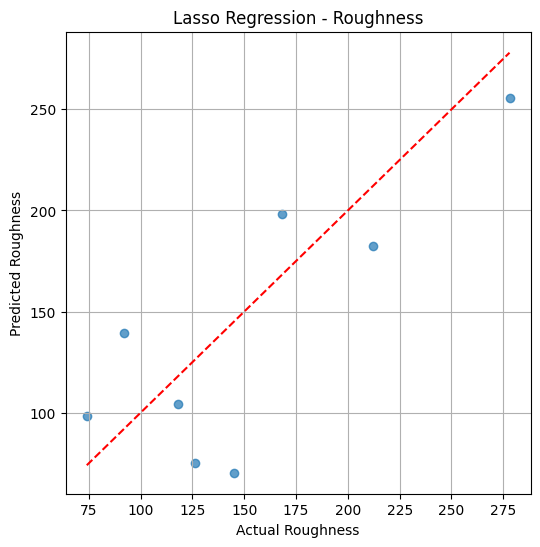

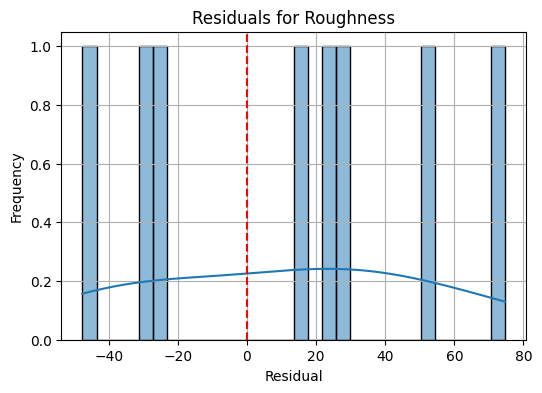


Lasso Regression – Elongation (alpha=1.0)
Train R²: 0.0000
Test  R²: -0.0722
MAE: 0.5406
RMSE: 0.6985


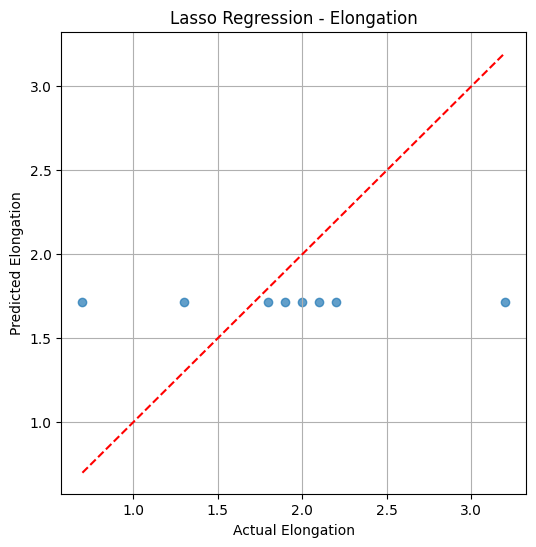

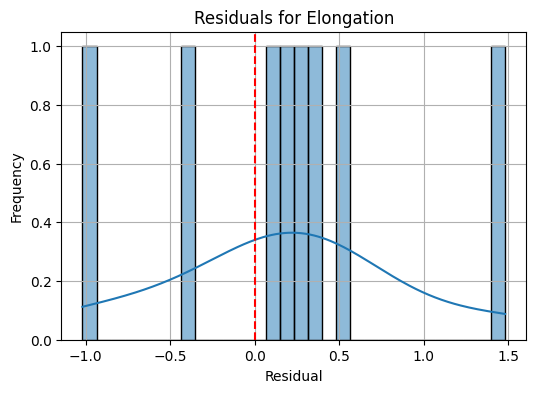


Lasso Regression – Tension Strength (alpha=1.0)
Train R²: 0.5994
Test  R²: 0.4544
MAE: 4.4618
RMSE: 5.7333


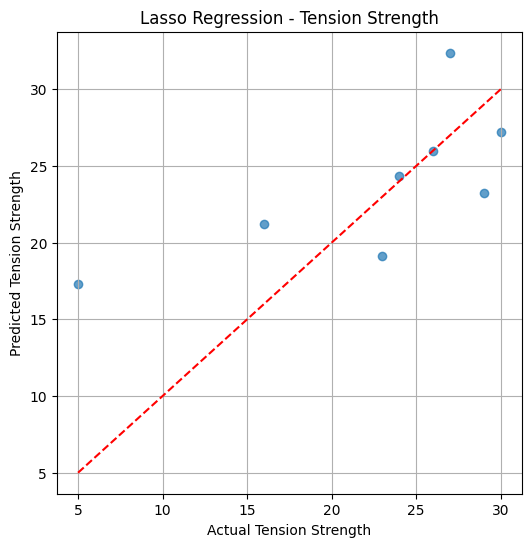

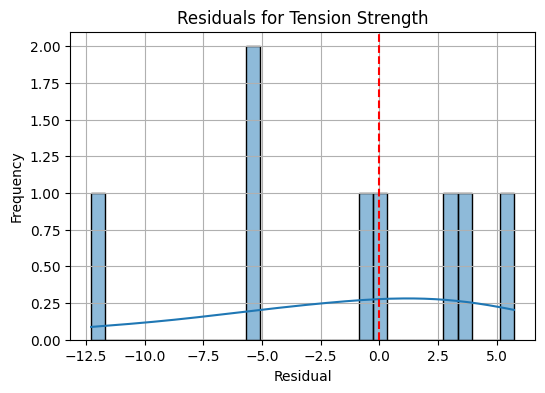

In [4]:
X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

y = dataset['roughness']
y_test, y_pred = run_lasso_regression(X, y, 'Roughness', alpha=1.0)
plot_residuals(y_test, y_pred, 'Roughness')

y = dataset['elongation']
y_test, y_pred = run_lasso_regression(X, y, 'Elongation', alpha=1.0)
plot_residuals(y_test, y_pred, 'Elongation')

y = dataset['tension_strenght']
y_test, y_pred = run_lasso_regression(X, y, 'Tension Strength', alpha=1.0)
plot_residuals(y_test, y_pred, 'Tension Strength')


### Lasso Cross-Validation Results

To further evaluate model generalisation, we apply **5-fold cross-validation** for each target using the Lasso regression model. This method splits the data into five parts, trains on four, and tests on the remaining one—repeating this process to reduce the influence of a single data split.

We report:
- R² scores across all folds
- The average R² score
- The standard deviation, to assess performance consistency

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

def cross_validate_lasso(X, y, target_name, alpha=1.0):
    model = Lasso(alpha=alpha, max_iter=10000)
    
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f"\n🔍 Cross-Validation for {target_name} (alpha={alpha}):")
    print("R² scores per fold:", scores)
    print(f"Mean R²: {mean_score:.4f}")
    print(f"Std deviation: {std_score:.4f}")

X = dataset.drop(columns=['roughness', 'elongation', 'tension_strenght'])

cross_validate_lasso(X, dataset['roughness'], 'Roughness', alpha=1.0)

cross_validate_lasso(X, dataset['elongation'], 'Elongation', alpha=1.0)

cross_validate_lasso(X, dataset['tension_strenght'], 'Tension Strength', alpha=1.0)


🔍 Cross-Validation for Roughness (alpha=1.0):
R² scores per fold: [-18.73766784   0.7257723    0.68235505   0.54438388  -5.01911254]
Mean R²: -4.3609
Std deviation: 7.5166

🔍 Cross-Validation for Elongation (alpha=1.0):
R² scores per fold: [-13.0509333    0.58441444   0.43482937   0.02119887  -1.08924074]
Mean R²: -2.6199
Std deviation: 5.2483

🔍 Cross-Validation for Tension Strength (alpha=1.0):
R² scores per fold: [-5.81220253  0.58534091  0.45759381  0.17070122 -3.71561254]
Mean R²: -1.6628
Std deviation: 2.6208


### Simplified Lasso Model Runner

This version of the Lasso regression function focuses solely on model training and prediction without scaling or plotting. It's useful when you want quick access to the predicted values and model object—for example, when evaluating model coefficients or running additional diagnostics separately.

In [6]:
def run_lasso_regression(X, y, target_name, alpha=1.0):
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return y_test, y_pred, model

### Analysing Lasso Regression Coefficients

This section evaluates the sparsity-inducing behaviour of Lasso regression by examining the model coefficients for each target variable.

Lasso applies L1 regularisation, which can reduce some coefficients exactly to zero. This makes it useful for feature selection, as non-contributing features are effectively removed from the model.

For each target:
- The learned coefficients are printed.
- The number of coefficients reduced to zero is counted and displayed.

This allows you to compare the influence of different features across the target variables and assess the feature elimination effect of Lasso.

In [7]:
y_test, y_pred, model = run_lasso_regression(X, dataset['roughness'], 'Roughness', alpha=1.0)

print("Lasso Coefficients (roughness):", model.coef_)
print("Zero coefficients (roughness):", np.sum(model.coef_ == 0))

y_test, y_pred, model = run_lasso_regression(X, dataset['elongation'], 'Elongation', alpha=1.0)
print("Lasso Coefficients (Elongation):", model.coef_)
print("Zero coefficients (Elongation):", np.sum(model.coef_ == 0))

y_test, y_pred, model = run_lasso_regression(X, dataset['tension_strenght'], 'Tension Strength', alpha=1.0)
print("Lasso Coefficients (Tension Strength):", model.coef_)
print("Zero coefficients (Tension Strength):", np.sum(model.coef_ == 0))


Lasso Coefficients (roughness): [ 1.05430469e+03  0.00000000e+00 -7.36258217e-02  1.02546746e+01
 -1.18499365e+00 -1.03717874e-01 -1.73207957e+00  1.25903148e+00
  1.86923857e+02]
Zero coefficients (roughness): 1
Lasso Coefficients (Elongation): [ 0.          0.          0.00651024 -0.02214163 -0.         -0.
 -0.00200695 -0.          0.        ]
Zero coefficients (Elongation): 6
Lasso Coefficients (Tension Strength): [ 0.          0.84033033  0.18723729 -0.29806844 -0.          0.11242575
 -0.         -0.         -0.        ]
Zero coefficients (Tension Strength): 5


### Final Summary: Lasso Regression Notebook

This notebook applies and evaluates Lasso Regression models on three mechanical properties: Roughness, Elongation, and Tension Strength. Lasso’s ability to shrink coefficients and eliminate non-informative features makes it well-suited for identifying the most relevant input variables in the dataset.

1. **Preprocessing and Setup**  
   The dataset was cleaned and scaled using `StandardScaler` to ensure compatibility with Lasso’s sensitivity to feature magnitude.

2. **Model Training and Evaluation**  
   Lasso models were trained using `train_test_split` and assessed with standard metrics: R², MAE, and RMSE. Plots of actual vs predicted values and residual distributions provided visual insight into prediction quality.

3. **Cross-Validation**  
   5-fold cross-validation was used to evaluate generalisability. Mean and standard deviation of R² across folds were reported to assess consistency.

4. **Model Interpretation**  
   Lasso’s feature selection behaviour was analysed by printing learned coefficients and counting how many were reduced to zero. This reinforced its role in simplifying the model and improving interpretability.

This structured approach ensures the model is both performance-evaluated and interpreted in line with best practices. All results were obtained from reproducible, modular code using scikit-learn tools.